# Importing Libraries

In [32]:
import h5py
import tensorflow
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the h5py file and understand the train/test splits

In [133]:
h5f=h5py.File('SVHN_single_grey1.h5','r')
h5f.keys()

KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)

In [134]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [135]:
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(42000, 32, 32)
Shape of y_train:(42000,)
Shape of X_test:(18000, 32, 32)
Shape of y_test:(18000,)


In [141]:
X_train.shape[0]+X_test.shape[0]

60000

In [142]:
print('Total data:{}'.format(X_train.shape[0]+X_test.shape[0]))
print('Training Data:{}'.format(X_train.shape[0]))
print('Testing Data:{}'.format(X_test.shape[0]))
print('Percentage of Training Data:{}%'.format(((X_train.shape[0])/(X_train.shape[0]+X_test.shape[0]))*100))
print('Percentage of Testing Data:{}%'.format(((X_test.shape[0])/(X_train.shape[0]+X_test.shape[0]))*100))

Total data:60000
Training Data:42000
Testing Data:18000
Percentage of Training Data:70.0%
Percentage of Testing Data:30.0%


## Reshaping and Normalizing 

In [143]:
X_train=X_train.reshape(X_train.shape[0],32,32,1)
X_test=X_test.reshape(X_test.shape[0],32,32,1)

In [144]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255

In [145]:
print('X_train shape:{}'.format(X_train.shape))
print('Images in X_train:{}'.format(X_train.shape[0]))
print('Images in X_test:{}'.format(X_test.shape[0]))
print('Max Value in X_train:{}'.format(X_train.max()))
print('Min value in X_train:{}'.format(X_train.min()))

X_train shape:(42000, 32, 32, 1)
Images in X_train:42000
Images in X_test:18000
Max Value in X_train:0.9998999834060669
Min value in X_train:0.0


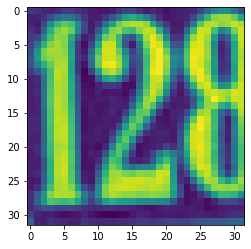

In [146]:
plt.imshow(X_train[0])

## One-hot encoding the labels

In [147]:
y_train=tensorflow.keras.utils.to_categorical(y_train)
y_test=tensorflow.keras.utils.to_categorical(y_test)

In [148]:
print('Shape of y_train')
y_train[0]

Shape of y_train


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Defining the model architecture
### 1. Model type-Sequential
### 2. Flatten Layer
### 3. Dense Layer(128) with activation function 'relu'
### 4. Dense Layer(10) with activation function 'softmax'

In [149]:
from tensorflow.keras.layers import Dense, Flatten,BatchNormalization
from tensorflow.keras.models import Sequential
model1=Sequential()
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))


# Compiling the model
Loss-categorical_crossentropy

Optimizer-Adam

Metric-Accuracy

In [150]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

# Fiting the model

In [151]:
model1.fit(x=X_train, y=y_train,epochs=50,validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 4s 96us/sample - loss: 2.2873 - accuracy: 0.1132 - val_loss: 2.2492 - val_accuracy: 0.1312
Epoch 2/50
42000/42000 [==============================] - 4s 92us/sample - loss: 2.2416 - accuracy: 0.1319 - val_loss: 2.2363 - val_accuracy: 0.1369
Epoch 3/50
42000/42000 [==============================] - 3s 78us/sample - loss: 2.2325 - accuracy: 0.1345 - val_loss: 2.2257 - val_accuracy: 0.1384
Epoch 4/50
42000/42000 [==============================] - 3s 74us/sample - loss: 2.2303 - accuracy: 0.1327 - val_loss: 2.2243 - val_accuracy: 0.1384
Epoch 5/50
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2288 - accuracy: 0.1341 - val_loss: 2.2271 - val_accuracy: 0.1362
Epoch 6/50
42000/42000 [==============================] - 3s 73us/sample - loss: 2.2277 - accuracy: 0.1322 - val_loss: 2.2231 - val_accuracy: 0.1378
Epoch 7/50
42000/42000 [==============================] 

In [152]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                  1049600   
_________________________________________________________________
dense_19 (Dense)             multiple                  10250     
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation 

In [153]:
model.evaluate(X_test, y_test)

18000/18000 [==============================] - 3s 142us/sample - loss: 1.6127 - accuracy: 0.4126


[1.6127127611372205, 0.4126111]

We can conclude that the above model does not perform well. It has a loss of 1.61 and an accuracy of 41.26%.

## Since the accuracy above is not good, I'll perform Hyperparameter tuning

In [108]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_val=h5f['X_test'][:]
y_val=h5f['y_test'][:]

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [110]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(18000, 1024)
print(X_val.shape)

(42000, 1024)
(18000, 1024)


In [111]:
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0

print(X_train.max())
print(X_train.min())


254.9745
0.0
0.9999
0.0


In [112]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Model Architecture Functions
Here, I created a function which takes three main inputs: Iterations(epochs), lr(Learning Rate), and Lambda(Momentum)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    adam = optimizers.Adam(lr=learning_rate, decay=1e-6)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=32, verbose= 1)

In [130]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    adam = optimizers.Adam(lr=learning_rate, decay=1e-6)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=32, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

In [116]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Train on 42000 samples
42000/42000 [==============================] - 21s 495us/sample - loss: 2.2940 - accuracy: 0.1300


In [117]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Train on 42000 samples
42000/42000 [==============================] - 11s 262us/sample - loss: 16579.4068 - accuracy: 0.1175


In [118]:
X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]
X_train = X_train_subset
y_train = y_train_subset

In [119]:
X_train.shape

(20, 1024)

In [120]:
y_train.shape

(20, 10)

In [121]:
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Train on 20 samples
Epoch 1/500
20/20 [==============================] - 2s 89ms/sample - loss: 2.4150 - accuracy: 0.1500
Epoch 2/500
20/20 [==============================] - 0s 645us/sample - loss: 1.9422 - accuracy: 0.3000
Epoch 3/500
20/20 [==============================] - 0s 815us/sample - loss: 1.8145 - accuracy: 0.2500
Epoch 4/500
20/20 [==============================] - 0s 631us/sample - loss: 1.7520 - accuracy: 0.3000
Epoch 5/500
20/20 [==============================] - 0s 1ms/sample - loss: 1.6659 - accuracy: 0.4000
Epoch 6/500
20/20 [==============================] - 0s 1ms/sample - loss: 1.5734 - accuracy: 0.3500
Epoch 7/500
20/20 [==============================] - 0s 1ms/sample - loss: 1.4914 - accuracy: 0.6000
Epoch 8/500
20/20 [==============================] - 0s 551us/sample - loss: 1.4302 - accuracy: 0.4500
Epoch 9/500
20/20 [==============================] - 0s 478us/sample - loss: 1.3417 - accuracy: 0.6000
Epoch 10/500
20/20 [==============================] - 0s 473

Epoch 80/500
20/20 [==============================] - 0s 735us/sample - loss: 0.0051 - accuracy: 1.0000
Epoch 81/500
20/20 [==============================] - 0s 451us/sample - loss: 0.0050 - accuracy: 1.0000
Epoch 82/500
20/20 [==============================] - 0s 482us/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 83/500
20/20 [==============================] - 0s 446us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 84/500
20/20 [==============================] - 0s 464us/sample - loss: 0.0047 - accuracy: 1.0000
Epoch 85/500
20/20 [==============================] - 0s 534us/sample - loss: 0.0046 - accuracy: 1.0000
Epoch 86/500
20/20 [==============================] - 0s 517us/sample - loss: 0.0045 - accuracy: 1.0000
Epoch 87/500
20/20 [==============================] - 0s 493us/sample - loss: 0.0044 - accuracy: 1.0000
Epoch 88/500
20/20 [==============================] - 0s 531us/sample - loss: 0.0043 - accuracy: 1.0000
Epoch 89/500
20/20 [==============================] - 0s 371us/s

Epoch 159/500
20/20 [==============================] - 0s 432us/sample - loss: 0.0017 - accuracy: 1.0000
Epoch 160/500
20/20 [==============================] - 0s 459us/sample - loss: 0.0017 - accuracy: 1.0000
Epoch 161/500
20/20 [==============================] - 0s 681us/sample - loss: 0.0017 - accuracy: 1.0000
Epoch 162/500
20/20 [==============================] - 0s 552us/sample - loss: 0.0017 - accuracy: 1.0000
Epoch 163/500
20/20 [==============================] - 0s 511us/sample - loss: 0.0016 - accuracy: 1.0000
Epoch 164/500
20/20 [==============================] - 0s 655us/sample - loss: 0.0016 - accuracy: 1.0000
Epoch 165/500
20/20 [==============================] - 0s 699us/sample - loss: 0.0016 - accuracy: 1.0000
Epoch 166/500
20/20 [==============================] - 0s 617us/sample - loss: 0.0016 - accuracy: 1.0000
Epoch 167/500
20/20 [==============================] - 0s 472us/sample - loss: 0.0016 - accuracy: 1.0000
Epoch 168/500
20/20 [==============================] - 

Epoch 237/500
20/20 [==============================] - 0s 454us/sample - loss: 8.3357e-04 - accuracy: 1.0000
Epoch 238/500
20/20 [==============================] - 0s 440us/sample - loss: 8.2673e-04 - accuracy: 1.0000
Epoch 239/500
20/20 [==============================] - 0s 543us/sample - loss: 8.2010e-04 - accuracy: 1.0000
Epoch 240/500
20/20 [==============================] - 0s 297us/sample - loss: 8.1347e-04 - accuracy: 1.0000
Epoch 241/500
20/20 [==============================] - 0s 400us/sample - loss: 8.0690e-04 - accuracy: 1.0000
Epoch 242/500
20/20 [==============================] - 0s 411us/sample - loss: 8.0038e-04 - accuracy: 1.0000
Epoch 243/500
20/20 [==============================] - 0s 312us/sample - loss: 7.9401e-04 - accuracy: 1.0000
Epoch 244/500
20/20 [==============================] - 0s 393us/sample - loss: 7.8764e-04 - accuracy: 1.0000
Epoch 245/500
20/20 [==============================] - 0s 426us/sample - loss: 7.8142e-04 - accuracy: 1.0000
Epoch 246/500
20/20

Epoch 313/500
20/20 [==============================] - 0s 601us/sample - loss: 4.7630e-04 - accuracy: 1.0000
Epoch 314/500
20/20 [==============================] - 0s 410us/sample - loss: 4.7312e-04 - accuracy: 1.0000
Epoch 315/500
20/20 [==============================] - 0s 292us/sample - loss: 4.7002e-04 - accuracy: 1.0000
Epoch 316/500
20/20 [==============================] - 0s 498us/sample - loss: 4.6695e-04 - accuracy: 1.0000
Epoch 317/500
20/20 [==============================] - 0s 465us/sample - loss: 4.6384e-04 - accuracy: 1.0000
Epoch 318/500
20/20 [==============================] - 0s 291us/sample - loss: 4.6082e-04 - accuracy: 1.0000
Epoch 319/500
20/20 [==============================] - 0s 643us/sample - loss: 4.5783e-04 - accuracy: 1.0000
Epoch 320/500
20/20 [==============================] - 0s 447us/sample - loss: 4.5485e-04 - accuracy: 1.0000
Epoch 321/500
20/20 [==============================] - 0s 435us/sample - loss: 4.5184e-04 - accuracy: 1.0000
Epoch 322/500
20/20

Epoch 389/500
20/20 [==============================] - 0s 554us/sample - loss: 3.0103e-04 - accuracy: 1.0000
Epoch 390/500
20/20 [==============================] - 0s 418us/sample - loss: 2.9943e-04 - accuracy: 1.0000
Epoch 391/500
20/20 [==============================] - 0s 299us/sample - loss: 2.9772e-04 - accuracy: 1.0000
Epoch 392/500
20/20 [==============================] - 0s 590us/sample - loss: 2.9614e-04 - accuracy: 1.0000
Epoch 393/500
20/20 [==============================] - 0s 600us/sample - loss: 2.9454e-04 - accuracy: 1.0000
Epoch 394/500
20/20 [==============================] - 0s 645us/sample - loss: 2.9295e-04 - accuracy: 1.0000
Epoch 395/500
20/20 [==============================] - 0s 605us/sample - loss: 2.9136e-04 - accuracy: 1.0000
Epoch 396/500
20/20 [==============================] - 0s 416us/sample - loss: 2.8977e-04 - accuracy: 1.0000
Epoch 397/500
20/20 [==============================] - 0s 351us/sample - loss: 2.8823e-04 - accuracy: 1.0000
Epoch 398/500
20/20

Epoch 465/500
20/20 [==============================] - 0s 387us/sample - loss: 2.0603e-04 - accuracy: 1.0000
Epoch 466/500
20/20 [==============================] - 0s 303us/sample - loss: 2.0508e-04 - accuracy: 1.0000
Epoch 467/500
20/20 [==============================] - 0s 522us/sample - loss: 2.0419e-04 - accuracy: 1.0000
Epoch 468/500
20/20 [==============================] - 0s 322us/sample - loss: 2.0324e-04 - accuracy: 1.0000
Epoch 469/500
20/20 [==============================] - 0s 465us/sample - loss: 2.0232e-04 - accuracy: 1.0000
Epoch 470/500
20/20 [==============================] - 0s 404us/sample - loss: 2.0138e-04 - accuracy: 1.0000
Epoch 471/500
20/20 [==============================] - 0s 394us/sample - loss: 2.0048e-04 - accuracy: 1.0000
Epoch 472/500
20/20 [==============================] - 0s 367us/sample - loss: 1.9960e-04 - accuracy: 1.0000
Epoch 473/500
20/20 [==============================] - 0s 416us/sample - loss: 1.9870e-04 - accuracy: 1.0000
Epoch 474/500
20/20

In [122]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_val=h5f['X_test'][:]
y_val=h5f['y_test'][:]

In [123]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_val = X_val.reshape(18000, 1024)
print(X_val.shape)

(42000, 1024)
(18000, 1024)


In [124]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [125]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)

In [126]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Train on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 10s 246us/sample - loss: 2.3720 - accuracy: 0.1032
Epoch 2/20
42000/42000 [==============================] - 9s 224us/sample - loss: 2.3467 - accuracy: 0.1017
Epoch 3/20
42000/42000 [==============================] - 10s 229us/sample - loss: 2.3306 - accuracy: 0.1039
Epoch 4/20
42000/42000 [==============================] - 9s 211us/sample - loss: 2.3203 - accuracy: 0.1058
Epoch 5/20
42000/42000 [==============================] - 9s 214us/sample - loss: 2.3137 - accuracy: 0.1097
Epoch 6/20
42000/42000 [==============================] - 10s 235us/sample - loss: 2.3094 - accuracy: 0.1100
Epoch 7/20
42000/42000 [==============================] - 10s 229us/sample - loss: 2.3065 - accuracy: 0.1110
Epoch 8/20
42000/42000 [==============================] - 9s 224us/sample - loss: 2.3045 - accuracy: 0.1121
Epoch 9/20
42000/42000 [==============================] - 10s 238us/sample - loss: 2.3030 - accuracy: 0.1141


In [127]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Train on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 10s 244us/sample - loss: nan - accuracy: 0.0996
Epoch 2/20
42000/42000 [==============================] - 8s 198us/sample - loss: nan - accuracy: 0.0997
Epoch 3/20
42000/42000 [==============================] - 9s 217us/sample - loss: nan - accuracy: 0.0997
Epoch 4/20
42000/42000 [==============================] - 9s 223us/sample - loss: nan - accuracy: 0.0997
Epoch 5/20
42000/42000 [==============================] - 10s 239us/sample - loss: nan - accuracy: 0.0997
Epoch 6/20
42000/42000 [==============================] - ETA: 0s - loss: nan - accuracy: 0.099 - 9s 212us/sample - loss: nan - accuracy: 0.0997
Epoch 7/20
42000/42000 [==============================] - 10s 234us/sample - loss: nan - accuracy: 0.0997
Epoch 8/20
42000/42000 [==============================] - 10s 229us/sample - loss: nan - accuracy: 0.0997
Epoch 9/20
42000/42000 [==============================] - 10s 237us/sample - loss: nan - accu

In [128]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Train on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 10s 243us/sample - loss: 1275859327239397.2500 - accuracy: 0.0999
Epoch 2/20
42000/42000 [==============================] - 10s 232us/sample - loss: 797673.6944 - accuracy: 0.1028
Epoch 3/20
42000/42000 [==============================] - 10s 239us/sample - loss: 793365.4349 - accuracy: 0.1004
Epoch 4/20
42000/42000 [==============================] - 10s 233us/sample - loss: 786719.5578 - accuracy: 0.0961
Epoch 5/20
42000/42000 [==============================] - 10s 237us/sample - loss: 776598.7304 - accuracy: 0.0992
Epoch 6/20
42000/42000 [==============================] - 10s 233us/sample - loss: 762697.1225 - accuracy: 0.0997
Epoch 7/20
42000/42000 [==============================] - 10s 236us/sample - loss: 745522.8631 - accuracy: 0.0995
Epoch 8/20
42000/42000 [==============================] - 10s 232us/sample - loss: 725788.4145 - accuracy: 0.1017
Epoch 9/20
42000/42000 [==============================]

In [131]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 11s 253us/sample - loss: 2.1686 - accuracy: 0.1663
Epoch 2/100
42000/42000 [==============================] - 10s 230us/sample - loss: 1.9968 - accuracy: 0.2333
Epoch 3/100
42000/42000 [==============================] - 10s 228us/sample - loss: 1.9707 - accuracy: 0.2518
Epoch 4/100
42000/42000 [==============================] - 9s 216us/sample - loss: 1.8191 - accuracy: 0.3500
Epoch 5/100
42000/42000 [==============================] - 10s 231us/sample - loss: 1.6386 - accuracy: 0.4317
Epoch 6/100
42000/42000 [==============================] - 9s 223us/sample - loss: 1.5879 - accuracy: 0.4517
Epoch 7/100
42000/42000 [==============================] - 9s 226us/sample - loss: 1.5476 - accuracy: 0.4682
Epoch 8/100
42000/42000 [==============================] - 8s 199us/sample - loss: 1.5192 - accuracy: 0.4795
Epoch 9/100
42000/42000 [==============================] - 9s 220us/sample - loss: 1.5093 - accuracy:

42000/42000 [==============================] - 5s 122us/sample - loss: 1.0108 - accuracy: 0.7086
Epoch 48/100
42000/42000 [==============================] - 5s 127us/sample - loss: 1.0030 - accuracy: 0.7118
Epoch 49/100
42000/42000 [==============================] - 5s 121us/sample - loss: 0.9961 - accuracy: 0.7126
Epoch 50/100
42000/42000 [==============================] - 5s 120us/sample - loss: 0.9886 - accuracy: 0.7152
Epoch 51/100
42000/42000 [==============================] - 5s 128us/sample - loss: 0.9819 - accuracy: 0.7183
Epoch 52/100
42000/42000 [==============================] - 5s 121us/sample - loss: 0.9751 - accuracy: 0.7198
Epoch 53/100
42000/42000 [==============================] - 5s 124us/sample - loss: 0.9684 - accuracy: 0.7208
Epoch 54/100
42000/42000 [==============================] - 5s 128us/sample - loss: 0.9619 - accuracy: 0.7214
Epoch 55/100
42000/42000 [==============================] - 5s 125us/sample - loss: 0.9555 - accuracy: 0.7244
Epoch 56/100
42000/4200

42000/42000 [==============================] - 6s 142us/sample - loss: 2.2659 - accuracy: 0.2065
Epoch 95/100
42000/42000 [==============================] - 6s 133us/sample - loss: 2.2654 - accuracy: 0.2077
Epoch 96/100
42000/42000 [==============================] - 5s 120us/sample - loss: 2.2650 - accuracy: 0.2076
Epoch 97/100
42000/42000 [==============================] - 5s 127us/sample - loss: 2.2645 - accuracy: 0.2100
Epoch 98/100
42000/42000 [==============================] - 5s 119us/sample - loss: 2.2640 - accuracy: 0.2110
Epoch 99/100
42000/42000 [==============================] - 5s 126us/sample - loss: 2.2636 - accuracy: 0.2121
Epoch 100/100
42000/42000 [==============================] - 5s 118us/sample - loss: 2.2631 - accuracy: 0.2125
Try 3/100: Best_val_acc: [2.2627661152794247, 0.21342857], lr: 1.7489105039390994e-07, Lambda: 5.7716487038439764e-05

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 5s 131us/sample - loss: 294.4076 - accura

42000/42000 [==============================] - 6s 142us/sample - loss: 2.5545 - accuracy: 0.1003
Epoch 41/100
42000/42000 [==============================] - 5s 122us/sample - loss: 2.5339 - accuracy: 0.1008
Epoch 42/100
42000/42000 [==============================] - 5s 116us/sample - loss: 2.5296 - accuracy: 0.1000
Epoch 43/100
42000/42000 [==============================] - 5s 124us/sample - loss: 2.5303 - accuracy: 0.1026
Epoch 44/100
42000/42000 [==============================] - 5s 116us/sample - loss: 2.5398 - accuracy: 0.1022
Epoch 45/100
42000/42000 [==============================] - 5s 115us/sample - loss: 2.5288 - accuracy: 0.0987
Epoch 46/100
42000/42000 [==============================] - 5s 124us/sample - loss: 2.5310 - accuracy: 0.0976
Epoch 47/100
42000/42000 [==============================] - 5s 115us/sample - loss: 2.5456 - accuracy: 0.0992
Epoch 48/100
42000/42000 [==============================] - 5s 111us/sample - loss: 2.5392 - accuracy: 0.0980
Epoch 49/100
42000/4200

42000/42000 [==============================] - 6s 134us/sample - loss: 2.3034 - accuracy: 0.1014
Epoch 88/100
42000/42000 [==============================] - 5s 120us/sample - loss: 2.3036 - accuracy: 0.0984
Epoch 89/100
42000/42000 [==============================] - 6s 145us/sample - loss: 2.3035 - accuracy: 0.0996
Epoch 90/100
42000/42000 [==============================] - 6s 134us/sample - loss: 2.3036 - accuracy: 0.0973
Epoch 91/100
42000/42000 [==============================] - 5s 128us/sample - loss: 2.3034 - accuracy: 0.0984
Epoch 92/100
42000/42000 [==============================] - 6s 143us/sample - loss: 2.3035 - accuracy: 0.0978
Epoch 93/100
42000/42000 [==============================] - 5s 125us/sample - loss: 2.3034 - accuracy: 0.1005
Epoch 94/100
42000/42000 [==============================] - 5s 126us/sample - loss: 2.3037 - accuracy: 0.0980
Epoch 95/100
42000/42000 [==============================] - 6s 143us/sample - loss: 2.3035 - accuracy: 0.0990
Epoch 96/100
42000/4200

42000/42000 [==============================] - 5s 119us/sample - loss: 2.3142 - accuracy: 0.1005
Epoch 61/100
42000/42000 [==============================] - 4s 107us/sample - loss: 2.3137 - accuracy: 0.1032
Epoch 62/100
42000/42000 [==============================] - 4s 102us/sample - loss: 2.3141 - accuracy: 0.0965
Epoch 63/100
42000/42000 [==============================] - 4s 107us/sample - loss: 2.3141 - accuracy: 0.1005
Epoch 64/100
42000/42000 [==============================] - 4s 102us/sample - loss: 2.3149 - accuracy: 0.1000
Epoch 65/100
42000/42000 [==============================] - 4s 100us/sample - loss: 2.3137 - accuracy: 0.1012
Epoch 66/100
42000/42000 [==============================] - 4s 105us/sample - loss: 2.3144 - accuracy: 0.0990
Epoch 67/100
42000/42000 [==============================] - 4s 106us/sample - loss: 2.3135 - accuracy: 0.1002
Epoch 68/100
42000/42000 [==============================] - 4s 100us/sample - loss: 2.3143 - accuracy: 0.0987
Epoch 69/100
42000/4200

42000/42000 [==============================] - 5s 123us/sample - loss: 2.4565 - accuracy: 0.1231
Epoch 7/100
42000/42000 [==============================] - 5s 120us/sample - loss: 2.4548 - accuracy: 0.1260
Epoch 8/100
42000/42000 [==============================] - 5s 115us/sample - loss: 2.4532 - accuracy: 0.1273
Epoch 9/100
42000/42000 [==============================] - 5s 116us/sample - loss: 2.4517 - accuracy: 0.1303
Epoch 10/100
42000/42000 [==============================] - 5s 121us/sample - loss: 2.4502 - accuracy: 0.1330
Epoch 11/100
42000/42000 [==============================] - 5s 116us/sample - loss: 2.4487 - accuracy: 0.1351
Epoch 12/100
42000/42000 [==============================] - 5s 122us/sample - loss: 2.4473 - accuracy: 0.1370
Epoch 13/100
42000/42000 [==============================] - 5s 131us/sample - loss: 2.4458 - accuracy: 0.1398
Epoch 14/100
42000/42000 [==============================] - 5s 111us/sample - loss: 2.4443 - accuracy: 0.1436
Epoch 15/100
42000/42000 [

# Conclusion
Best_val_acc: [0.26084178347459863, 0.92288095], lr: 0.00010126629349548418, Lambda: 4.448111195108541e-07

So, from above analysis, we can conclude that the best lr is equal to 0.0001, Lambda=4.44

Final loss= 0.26, Final Accuracy=92.28%

We have successfully performed Hyperparameter Tuning to increase the accuracy from 41% to 92%. We have basically tried various iterations and chose the ones which had the best score and just noted their parameters.